In [1]:
%pylab
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from scipy.linalg import sqrtm, inv

def sym(w):
    return w.dot(inv(sqrtm(w.T.dot(w))))

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


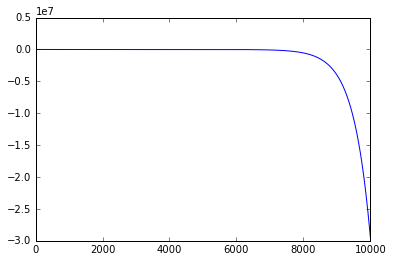

In [33]:
d = 1000; 
H = np.zeros((d,d))
lambd = np.ones(d)
lambd[d-1] = -1
V = np.zeros((d,d))
for i in range(d): 
    V[i,:] = np.random.randn(d)
V = sym(V)
L = np.random.rand(d)
L[d-1:d] = -0.01
L[d-200:d-1] = 0
H = np.dot(V,np.dot(np.diag(L),np.transpose(V)))
x = np.random.rand(d)*10
T = 10000
conv = np.zeros(T)
eta = 0.1
for i in range(T):
  conv[i] = np.dot(x,np.dot(H,x))
  #conv[i] = np.linalg.norm(np.dot(H,x))
  x = np.add(x,-1*eta*np.dot(H,x))
plot(range(T),(conv))

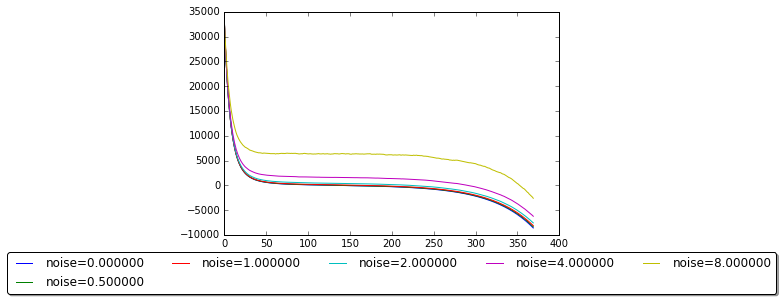

In [130]:
d = 2000; 
H = np.zeros((d,d))
lambd = np.ones(d)
lambd[d-1] = -1
V = np.zeros((d,d))
for i in range(d): 
    V[i,:] = np.random.randn(d)
V = sym(V)
L = np.random.rand(d)
L[d-1:d] = -0.1
#L[d-200:d-1] = 0
H = np.dot(V,np.dot(np.diag(L),np.transpose(V)))

T = 370

eta = 0.1

for j in range(6): 
    np.random.seed(15)
    if j == 0: 
        noise = 0 
    else: 
        noise = 0.25*pow(2,j)
    conv = np.zeros(T)
    K = 10
    for k in range(K):
        x = np.random.rand(d)*10
        for i in range(T):
          conv[i] = conv[i]+np.dot(x,np.dot(H,x))
          x = np.add(x,-1*eta*(np.add(np.dot(H,x),noise*np.random.randn(d))))
    conv = np.divide(conv,K)
    plabel = "noise=%f" % noise    
    plt.plot(range(T),conv,label = plabel)
    lgd = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
           fancybox=True, shadow=True, ncol=5)


In [69]:
s


array([ 10.        ,  10.        ,  10.        ,  10.        ,
        10.        ,  10.        ,  10.        ,  10.        ,
        10.        ,  10.        ,   0.94307811,   0.92348578,
         0.89973015,   0.89152213,   0.87263663,   0.86796412,
         0.84167498,   0.82169461,   0.77103983,   0.71967609,
         0.695562  ,   0.6529593 ,   0.65230003,   0.65162502,
         0.63247204,   0.57885652,   0.46748309,   0.44260754,
         0.40824073,   0.36637429,   0.36327812,   0.32178167,
         0.28158121,   0.25347281,   0.21313202,   0.17224602,
         0.14509091,   0.06294666,   0.05037651,   0.03052839])

In [66]:
np.dot(t,np.transpose(t))

array([[  1.00000000e+00,   9.57604608e-15,  -1.06060317e-14, ...,
         -8.38912273e-15,  -2.68743361e-14,   2.47857290e-14],
       [  9.57604608e-15,   1.00000000e+00,   3.85959343e-14, ...,
          5.60003433e-14,  -2.02338146e-14,  -9.68738978e-14],
       [ -1.06060317e-14,   3.85959343e-14,   1.00000000e+00, ...,
         -8.32667268e-15,  -8.32667268e-17,   5.67601521e-15],
       ..., 
       [ -8.38912273e-15,   5.60003433e-14,  -8.32667268e-15, ...,
          1.00000000e+00,  -2.87964097e-15,   4.76702011e-15],
       [ -2.68743361e-14,  -2.02338146e-14,  -8.32667268e-17, ...,
         -2.87964097e-15,   1.00000000e+00,   7.57033325e-15],
       [  2.47857290e-14,  -9.68738978e-14,   5.67601521e-15, ...,
          4.76702011e-15,   7.57033325e-15,   1.00000000e+00]])